<a href="https://colab.research.google.com/github/Nandiniguptamk/Project/blob/main/workation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)


In [3]:
train=pd.read_csv("/content/Train.csv")

In [12]:
test=pd.read_csv("/content/Test.csv")

In [13]:
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [14]:
combined=pd.concat([train,test],ignore_index=True)
combined.shape,train.shape,test.shape


((30000, 15), (21000, 15), (9000, 14))

In [15]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

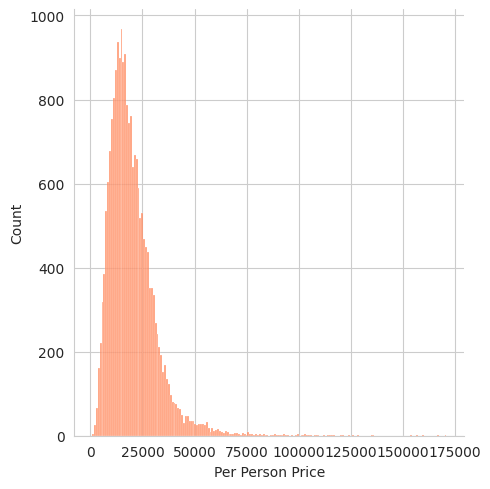

In [16]:
# check target variable
sns.displot(combined['Per Person Price'],color='coral')

In [17]:
len(combined['Places Covered'][0].split('|'))

4

In [18]:
# count of places visited
places=[]
for i in combined['Places Covered']:
  places.append(len(i.split('|')))


In [19]:
combined['Count_places']=pd.Series(places)

In [20]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Count_places'],
      dtype='object')

In [21]:
# similarly sideseeing places covered
sights=[]
for i in combined['Sightseeing Places Covered']:
  sights.append(len(i.split('|')))

In [22]:
combined['Count_ss']=pd.Series(sights)

In [23]:
combined['Airline'].unique()

array(['Not Available', 'IndiGo|IndiGo', 'IndiGo', 'Spicejet|Go Air',
       'Spicejet', 'IndiGo|Spicejet', 'Go Air|IndiGo', 'Air India',
       'Spicejet|Spicejet', 'Go Air', 'Emirates|Emirates',
       'Spicejet|Air India|Air India', 'Vistara',
       'Spicejet|IndiGo|IndiGo', 'Spicejet|Spicejet|Spicejet|Spicejet',
       'Thai Airways|Thai Airways|AirAsia Indonesia|Srilankan Airlines|Srilankan Airlines',
       'Spicejet|IndiGo', 'Srilankan Airlines|Srilankan Airlines',
       'IndiGo|IndiGo|IndiGo|IndiGo', 'Air India|Air India|Spicejet',
       'Go Air|IndiGo|IndiGo', 'Spicejet|AirAsia',
       'Emirates|Emirates|Emirates|Emirates', 'Air India|Spicejet',
       'Spicejet|Spicejet|Vistara', 'Air India Express|Air India Express',
       'Malindo Air|AirAsia Indonesia|Malindo Air|Malindo Air',
       'Air India|Air India|Air India|Air India', 'Air India|IndiGo',
       'Malaysia Airlines|Malaysia Airlines|Malaysia Airlines|Malaysia Airlines',
       'Vistara|Spicejet', 'AirAsia|Spicej

In [24]:
airlines=[]
for i in combined['Airline']:
  sights.append(len(i.split('|')))

In [25]:
combined['count_flights']=pd.Series(airlines)

In [28]:
# converting travel date into date-time
combined['Travel Date']=pd.to_datetime(combined['Travel Date'])

In [31]:
combined['Date']=combined['Travel Date'].dt.day
combined['Month']=combined['Travel Date'].dt.month
combined['Year']=combined['Travel Date'].dt.year
# dt is datetime

In [27]:
combined.loc[(combined.Airline=='Not Available')& (combined['Flight Stops']==0),"Meals"].describe()
# to check airline not available, flight stops ....Though the data is not available but meals is taken(coz min is 4). Therefore flight is taken

count    3070.000000
mean        4.583062
std         0.493133
min         4.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Meals, dtype: float64

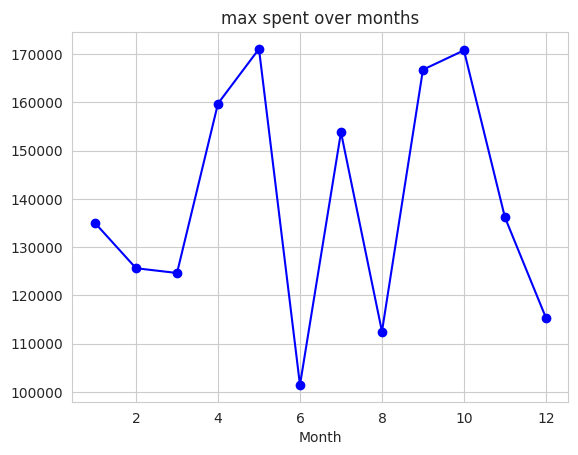

In [35]:
# Extract the pattern with the target variable...
max_month=combined.groupby('Month')['Per Person Price'].max()
max_month.plot(kind='line',marker='o',color='blue')
plt.title('max spent over months')
plt.show()
# [4,5,7,9,10]

In [36]:
peak=[4,5,7,9,10]
def peaks(x):
  if x in peak:
    return('Peak_month')
  else:
    return('Lean_month')
combined['Peak_months']=combined['Month'].apply(peaks)

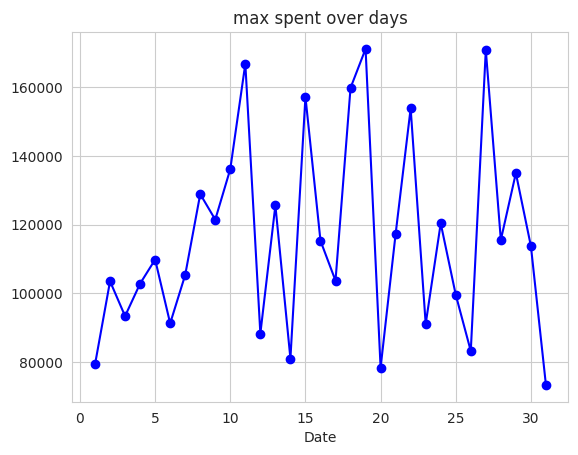

In [38]:
max_date=combined.groupby('Date')['Per Person Price'].max()
max_date.plot(kind='line',marker='o',color='blue')
plt.title('max spent over days')
plt.show()

In [44]:
peak_days=[2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]
def peaks(x):
  if x in peak_days:
    return('Peak_days')
  else:
    return('Lean_days')
combined['Peak_days']=combined['Date'].apply(peaks)

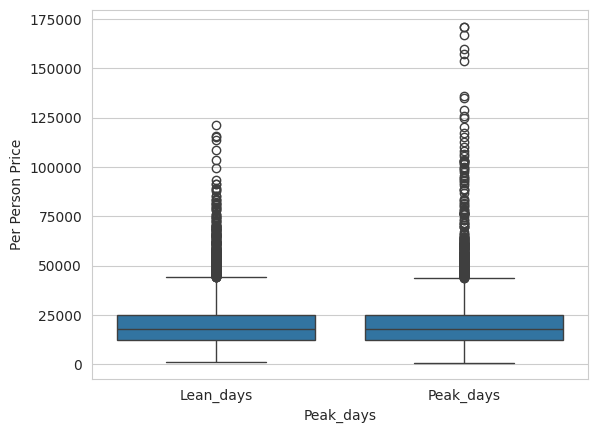

In [45]:
sns.boxplot(x='Peak_days',y='Per Person Price',data=combined)
plt.show()

In [46]:
import re

In [48]:
combined['duration']=combined['Itinerary'].apply(lambda x:np.sum(pd.to_numeric(re.findall('\d',x))))

In [54]:
combined['rating']=combined['Hotel Details'].apply(lambda x:np.mean(pd.to_numeric(re.findall('\d\.\d',x))))

In [59]:
combined.rating.fillna(combined.rating.median(),inplace=True)

In [60]:
combined.isnull().sum()

Uniq Id                           0
Package Name                      0
Package Type                      0
Destination                       0
Itinerary                         0
Places Covered                    0
Travel Date                       0
Hotel Details                     0
Start City                        0
Airline                           0
Flight Stops                      0
Meals                             0
Sightseeing Places Covered        0
Cancellation Rules                0
Per Person Price               9000
Count_places                      0
Count_ss                          0
count_flights                 30000
Date                              0
Month                             0
Year                              0
Peak_months                       0
Peak_days                         0
duration                          0
rating                            0
dtype: int64

In [62]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price', 'Count_places', 'Count_ss',
       'count_flights', 'Date', 'Month', 'Year', 'Peak_months', 'Peak_days',
       'duration', 'rating'],
      dtype='object')

In [64]:
newdata=combined.drop(['Uniq Id','Destination','Itinerary','Places Covered','Travel Date','Hotel Details','Airline','Sightseeing Places Covered','Cancellation Rules','Date','Month'],axis=1)

In [65]:
newdata

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_places,Count_ss,count_flights,Year,Peak_months,Peak_days,duration,rating
0,Best of Shimla and Manali Holiday from Delhi,Standard,Mumbai,2,3,11509.0,4,1,NaN,2021,Peak_month,Lean_days,6,4.100000
1,Kashmir Valley vacation,Premium,New Delhi,0,5,22485.5,3,7,NaN,2021,Lean_month,Peak_days,4,4.433333
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,New Delhi,0,4,12421.5,2,8,NaN,2021,Peak_month,Lean_days,3,4.400000
3,Colorful Kerala ( Romantic Getaway ),Premium,New Delhi,0,5,35967.0,4,9,NaN,2021,Lean_month,Peak_days,6,4.500000
4,A Week In Bangkok & Pattaya,Premium,New Delhi,0,5,25584.0,2,2,NaN,2021,Lean_month,Lean_days,7,4.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Trip to Kerala,Standard,New Delhi,2,3,NaN,3,10,NaN,2021,Lean_month,Peak_days,4,4.100000
29996,Magical Kashmir Holiday,Deluxe,Mumbai,1,3,NaN,4,12,NaN,2021,Lean_month,Peak_days,4,4.100000
29997,Holiday in Dharamshala and Dalhousie from Delhi,Luxury,Mumbai,0,4,NaN,2,12,NaN,2021,Lean_month,Peak_days,5,4.250000
29998,"Colorful Rajasthan- Jaipur, Jodhpur, Jaisalmer...",Deluxe,New Delhi,1,3,NaN,4,11,NaN,2021,Lean_month,Peak_days,7,4.125000


In [68]:
newdata['Package Type'].unique()

array(['Standard', 'Premium', 'Luxury', 'Deluxe', 'Budget'], dtype=object)

In [69]:
newdata.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [70]:
package={'Budget':1,'Deluxe':5,'Luxury':2,'Premium':4,'Standard':3}
newdata['Package Type']=newdata['Package Type'].map(package)

In [81]:
# count of package type basis duration
newdata['pkgtype_duration_count']=newdata.groupby('Package Type')['duration'].transform('count')
newdata['pkgtype_duration_mean']=newdata.groupby('Package Type')['duration'].transform('mean')
# count of package name basis duration
newdata['pkgname_duration_count']=newdata.groupby('Package Name')['duration'].transform('count')



In [82]:
newdata.columns

Index(['Package Name', 'Package Type', 'Start City', 'Flight Stops', 'Meals',
       'Per Person Price', 'Count_places', 'Count_ss', 'count_flights', 'Year',
       'Peak_months', 'Peak_days', 'duration', 'rating',
       'pkgtype_duration_count', 'pkgtype_duration_mean',
       'pkgname_duration_count'],
      dtype='object')

In [86]:
newdata.drop(['Package Name','Start City','Package Type'], axis= 1,inplace=True)

In [96]:
newdata['year']=newdata.Year.astype('object')

In [99]:
# categorical encoding
dummydata=pd.get_dummies(newdata,drop_first=True)
# split the data in train and test
newtrain=dummydata.loc[0:train.shape[0]-1,:]
newtest=dummydata.loc[train.shape[0]:,:]
train.shape,test.shape,newtrain.shape,newtest.shape

((21000, 15), (9000, 14), (21000, 14), (9000, 14))

In [100]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flight Stops            30000 non-null  int64  
 1   Meals                   30000 non-null  int64  
 2   Per Person Price        21000 non-null  float64
 3   Count_places            30000 non-null  int64  
 4   Count_ss                30000 non-null  int64  
 5   Year                    30000 non-null  int32  
 6   duration                30000 non-null  int64  
 7   rating                  30000 non-null  float64
 8   pkgtype_duration_count  30000 non-null  int64  
 9   pkgtype_duration_mean   30000 non-null  float64
 10  pkgname_duration_count  30000 non-null  int64  
 11  Peak_months_Peak_month  30000 non-null  bool   
 12  Peak_days_Peak_days     30000 non-null  bool   
 13  year_2022               30000 non-null  bool   
dtypes: bool(3), float64(3), int32(1), int6

In [101]:
newtest.drop('Per Person Price',axis=1,inplace=True)

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
x=newtrain.drop('Per Person Price',axis=1)
y=newtrain['Per Person Price']

gbm=GradientBoostingRegressor()
pred_gbm=gbm.fit(x,y).predict(newtest)

In [103]:
submission=pd.DataFrame({'Per Person Price':pred_gbm})
submission.to_csv('submission.csv',index=False)